In [4]:
from matplotlib import pyplot as plt
import numpy as np

## Métodos numéricos

Cuando trabajamos con métodos numéricos en la resolución de ecuaciones diferenciales, el objetivo es encontrar un conjunto de valores que se aproximen una solución particular de la ecuación diferencial propuesta.

Existen diferentes algoritmos que permiten implementar estos métodos numéricos, algunos más certeros que otros, y por tanto es posible (en ocasiones) estimar el error y decidir qué método emplear en cada etapa de la busqueda de una buena aproximación de la solución.


## Método de Euler

Se utiliza para encontrar una aproximación de la solución al problema de valor inicial

$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$

el algoritmo asociado al método de Euler está dado por:

Para $i=0,1, ... , n-1$ realizar <br>
*    $ x_i = x_0+ih $ <br>
*    $y_{i+1}= y_i +h f(x_i , y_i) $ <br>
    
Fin

## Ejemplo 1

Considere el problema de valores iniciales 
$$ y'=\dfrac{y}{x}+x\mathrm{e}^{-\frac{y}{x}} \quad ; \quad y(1)=2,$$
* a) Utilice el método de Euler para encontrar una aproximación de $y(11)$ para el problema de valores iniciales utilizando $h=1$.
* b) Encuentre la solución del PVI realizando la sustitución $y=zx$.
* c) En un mismo gráfico trace la solución aproximada y la solución explícita al PVI.
* c) Calcule el error absoluto al problema.
* d) Con los datos recabados concluya si es una buena aproximación.

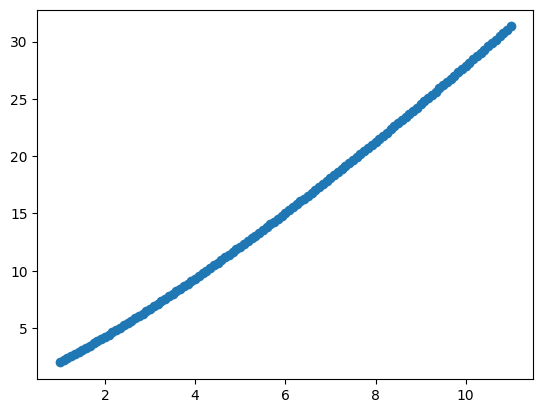

In [7]:
def Euler(f,x0,xn,y0,n):
    X = np.linspace(x0, xn, n + 1)
    Y = np.linspace(x0, xn, n + 1)
    Y[0] = y0
    h = (xn - x0) / n
    for i in range(n):
        Y[i+1] = Y[i] + h*f(X[i], Y[i])
    ret = dict()
    ret["x"] = X
    ret["y"] = Y
    return ret

def f(x,y): return (y/x)+x*np.exp(-y/x)

Aprox = Euler(f,1,11,2,120)
X = Aprox["x"]
Y = Aprox["y"]
plt.plot(X, Y,"o")

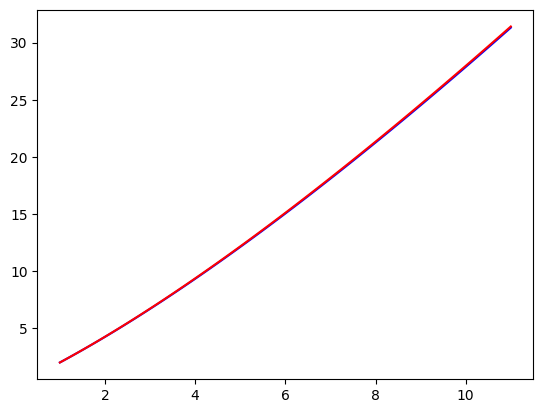

In [8]:
def g(x): return np.log(x+np.exp(2)-1) * x
x = np.linspace(1,11,100)
plt.plot(X,Y,color = "blue")
plt.plot(x,g(x), color = "red")


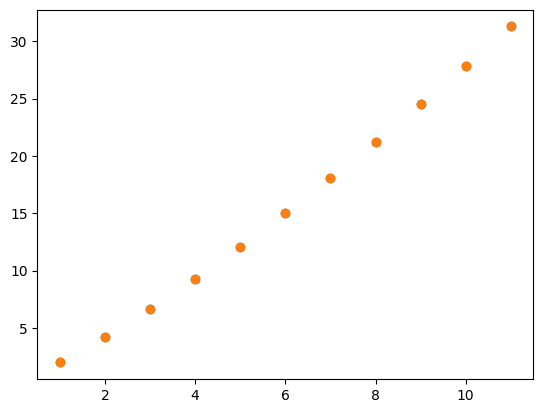

In [9]:
def RK22(f, x0, xn, y0, n):
    """
    Resuelve una ecuación diferencial ordinaria de primer orden utilizando el método de Runge-Kutta de segundo orden.

    Parámetros:
    - f: Función que define la ecuación diferencial. Debe tener la forma f(x, y).
    - x0: Valor inicial de la variable independiente.
    - xn: Valor final de la variable independiente.
    - y0: Valor inicial de la variable dependiente.
    - n: Número de pasos (subintervalos) para discretizar el intervalo [x0, xn].

    Devuelve:
    - ret: Un diccionario que contiene dos arreglos NumPy:
        - ret["x"]: Arreglo de valores de la variable independiente.
        - ret["y"]: Arreglo de valores de la variable dependiente, que representa la solución aproximada.

    Ejemplo de uso:
    solution = RK22(lambda x, y: x + y, 0, 1, 1, 10)
    print("x:", solution["x"])
    print("y:", solution["y"])
    """
    X = np.linspace(x0, xn, n + 1)
    Y = np.linspace(x0, xn, n + 1)
    Y[0] = y0
    h = (xn - x0) / n
    for i in range(n):
        K1 = f(X[i], Y[i])
        K2 = f(X[i] + h, Y[i] + h * K1)
        Y[i+1] = Y[i] + (h/2) * (K1 + K2)
    ret = dict()
    ret["x"] = X
    ret["y"] = Y
    return ret

Aprox = RK22(f,1,11,2,10)
X = Aprox["x"]
Y = Aprox["y"]
plt.plot(X, Y,"o")
Aprox2 = Euler(f,1,11,2,10)
X = Aprox["x"]
Y = Aprox["y"]
plt.plot(X, Y,"o")

## Ejemplo 2

* a) Defina una función en Python que permita encontrar una aproximación de $y(x_n)$ para el problema de valores iniciales general

$$ y'(x)=f(x,y) \quad , \quad y(x_0)=y_0$$

dados los datos de entrada $f(x,y), x_0, x_n, y_0, n$ (o $h$ en su defecto)

* b) Utilice la función anterior para encontrar una aproximación de $y(11)$ al PVI del ejemplo 1

In [29]:
def Euler(f,x0,xn,y0,n):
    X = np.linspace(x0, xn, n + 1)
    Y = np.linspace(x0, xn, n + 1)
    Y[0] = y0# Ejemplo de uso:
# Definir la función y su derivada, por ejemplo, f(x) = x^2 - 4
def func(x):
    return x**2 - 4

def func_prime(x):
    return 2*x

# Aproximación inicial
x0 = 2.0

# Calcular la aproximación de la raíz utilizando el método de Newton-Raphson
root_approximation = newton_raphson_approximation(x0, func, func_prime)

print(f"Aproximación de la raíz: {root_approximation}")
    h = (xn - x0) / n
    for i in range(n):
        Y[i+1] = Y[i] + h*f(X[i], Y[i])
    ret = dict()
    ret["x"] = X
    ret["y"] = Y
    return ret

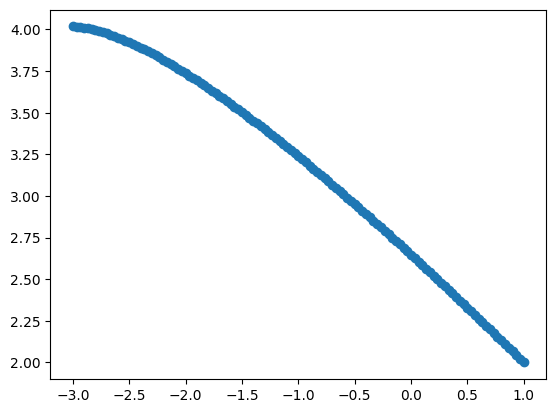

In [34]:
def f(x,y): return (1-x-y)/(x+y)

Aprox = Euler(f,1,-3,2,120)
X = Aprox["x"]
Y = Aprox["y"]
plt.plot(X, Y,"o")

## Ejemplo 3

La EDO autónoma y de Riccati

$$m \frac{dy}{dt} = mg − ky^2$$

modela la velocidad $y(t)$ de un cuerpo de masa $m$ (en kg) que está cayendo bajo la influencia de la gravedad. Debido a que el término $–ky^2$ representa la resistencia del aire, la velocidad de un cuerpo que cae de una gran altura no aumenta sin límite conforme pasa el tiempo $t$.

Suponga que el cuerpo tiene masa 2 $[kg]$ y $k = 2$ donde $g = 9, 8 \left[ \frac{m}{s^2} \right]$ y que en el instante $t=0$ el cuerpo tiene velociadad $10 \left[ \frac{m}{s} \right]$.

* a) Usando el método de Euler, determine la velocidad del cuerpo al cabo de $10 [s]$, usando:
    * $h=0.1$
    * $n=300$

* b) Verifique que $y(t) = \dfrac{\sqrt{g} \sqrt{m} }{\sqrt{k}} \tanh\left[ \sqrt{g} \sqrt{k}\left( C \sqrt{m}+ \dfrac{t}{\sqrt{m}} \right) \right]$ es la solución general de la EDO.
* c) Calcule la solución particular que satisface la condición inicial.
* d) Calcule el error cometido en cada uno de las aproximaciones de a). Justifique cuál es una mejor aproximación.

# Tarea 

Para el problema 
$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$

el algoritmo asociado al método RK4 está dado por:
    
Para $i=0,1, ... , n-1$ realizar <br>

*    $ x_i = x_0+ih $ <br>

*    $ K_1 = f(x_i,y_i) $ <br>

*    $ K_2 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_1 \right) $ <br>

*    $ K_3 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_2 \right) $ <br>

*    $ K_4 = f\left( x_i + h , y_i + h K_3 \right) $ <br>

*    $y_{i+1} = y_i + \dfrac{h}{6} \left[ K_1 + 2K_2 + 2K_3 + K_4 \right] $ <br>

Fin

* a) Defina una función en Python que permita encontrar una aproximación de $y(x_n)$ para el problema de valores iniciales general

$$ y'(x)=f(x,y) \quad , \quad y(x_0)=y_0$$

dados los datos de entrada $f(x,y), x_0, x_n, y_0, n$ (o $h$ en su defecto)

* b) Utilice la función anterior para encontrar una aproximación a elección del Ejemplo 1 y 3.

In [10]:
import numpy as np

def RK44(f, x0, xn, y0, n):
    """
    Resuelve una ecuación diferencial ordinaria de primer orden utilizando el método de Runge-Kutta de cuarto orden.

    Parámetros:
    - f: Función que define la ecuación diferencial. Debe tener la forma f(x, y).
    - x0: Valor inicial de la variable independiente.
    - xn: Valor final de la variable independiente.
    - y0: Valor inicial de la variable dependiente.
    - n: Número de pasos (subintervalos) para discretizar el intervalo [x0, xn].

    Devuelve:
    - ret: Un diccionario que contiene dos arreglos NumPy:
        - ret["x"]: Arreglo de valores de la variable independiente.
        - ret["y"]: Arreglo de valores de la variable dependiente, que representa la solución aproximada.

    Ejemplo de uso:
    solution = RK44(lambda x, y: x + y, 0, 1, 1, 10)
    print("x:", solution["x"])
    print("y:", solution["y"])
    """
    X = np.linspace(x0, xn, n + 1)
    Y = np.linspace(x0, xn, n + 1)
    Y[0] = y0
    h = (xn - x0) / n
    for i in range(n):
        K1 = h * f(X[i], Y[i])
        K2 = h * f(X[i] + h/2, Y[i] + K1/2)
        K3 = h * f(X[i] + h/2, Y[i] + K2/2)
        K4 = h * f(X[i] + h, Y[i] + K3)
        Y[i+1] = Y[i] + (K1 + 2*K2 + 2*K3 + K4) / 6
    ret = dict()
    ret["x"] = X
    ret["y"] = Y
    return ret
